In [36]:
import numpy as np
import matplotlib.pyplot as plt
class GridWorld:
    def __init__(self):
        # S O O O
        # O O O *
        # O * O O
        # O * 0 T
        self.qTable = None
        self.actionSpace = ('U', 'D', 'L', 'R')
        self.actions = {
            (0, 0): ('D', 'R'),
            (0, 1): ('L', 'D', 'R'),
            (0, 2): ('L', 'D', 'R'),
            (0, 3): ('L', 'D'),
            (1, 0): ('U', 'D', 'R'),
            (1, 1): ('U', 'L', 'D', 'R'),
            (1, 2): ('U', 'L', 'D', 'R'),
            (1, 3): ('U', 'L', 'D'),
            (2, 0): ('U', 'D', 'R'),
            (2, 1): ('U', 'L', 'D', 'R'),
            (2, 2): ('U', 'L', 'D', 'R'),
            (2, 3): ('U', 'L', 'D'),
            (3, 0): ('U', 'R'),
            (3, 1): ('U', 'L', 'R'),
            (3, 2): ('U', 'L', 'R')
        }
        self.rewards = {(3, 3): 0.5, (1, 3): -0.5, (2, 1):-0.5, (3, 1):-0.5}
        self.explored = 0
        self.exploited = 0
        self.initialQtable()

    def initialQtable(self):
      self.qTable = {}
      for state in self.actions:
          self.qTable[state]={}
          for move in self.actions[state]:
              self.qTable[state][move]=0
      print(self.qTable)

    def updateQtable(self, newQ,updateRate=0.05):
        for state in self.qTable:
            for action in self.qTable[state]:
                self.qTable[state][action] = self.qTable[state][action]+(updateRate*(newQ[state][action]-self.qTable[state][action]))
   
    def getRandomPolicy(self):
        policy = {}
        for state in self.actions:
            policy[state] = np.random.choice(self.actions[state])
        return policy

    def reset(self):
        return (0, 0)
        
    def is_terminal(self, s):
        return s not in self.actions

    def getNewState(self,state,action):
      i, j = zip(state)
      row = int(i[0])
      column = int(j[0])
      if action == 'U':
          row -= 1
      elif action == 'D':
          row += 1
      elif action == 'L':
          column -= 1
      elif action == 'R':
          column += 1
      return row,column

    def chooseAction(self, state, policy, exploreRate=0.01):
        if exploreRate > np.random.rand():
            self.explored += 1
            return np.random.choice(self.actions[state])
        self.exploited += 1
        return policy[state]

    def move(self, state, policy, exploreRate):
        action = self.chooseAction(state, policy, exploreRate)
        row,column=self.getNewState(state,action)
        if (row, column) in self.rewards:
            return action,(row, column),self.rewards[(row, column)]
        return action,(row, column),-0.01
        
    def printPolicy(self, policy):
        line = ""
        counter = 0
        for item in policy:
            line += f" | {policy[item]} | "
            counter += 1
            if counter > 3:
                print(line)
                print("----------------------------")
                counter = 0
                line = ""
        print(line)
        print("----------------------------")

{(0, 0): {'D': 0, 'R': 0}, (0, 1): {'L': 0, 'D': 0, 'R': 0}, (0, 2): {'L': 0, 'D': 0, 'R': 0}, (0, 3): {'L': 0, 'D': 0}, (1, 0): {'U': 0, 'D': 0, 'R': 0}, (1, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (1, 3): {'U': 0, 'L': 0, 'D': 0}, (2, 0): {'U': 0, 'D': 0, 'R': 0}, (2, 1): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 2): {'U': 0, 'L': 0, 'D': 0, 'R': 0}, (2, 3): {'U': 0, 'L': 0, 'D': 0}, (3, 0): {'U': 0, 'R': 0}, (3, 1): {'U': 0, 'L': 0, 'R': 0}, (3, 2): {'U': 0, 'L': 0, 'R': 0}}



 step:0 - Average reward so far:-0.20000000000000004



 step:0
 | D |  | L |  | L |  | L | 
----------------------------
 | U |  | L |  | U |  | U | 
----------------------------
 | U |  | U |  | U |  | U | 
----------------------------
 | U |  | U |  | U | 
----------------------------





 step:200 - Average reward so far:0.17547263681592024



 step:200
 | R |  | D |  | D |  | L | 
----------------------------
 | R |  | R |  | D |  | D | 
----------------------------
 

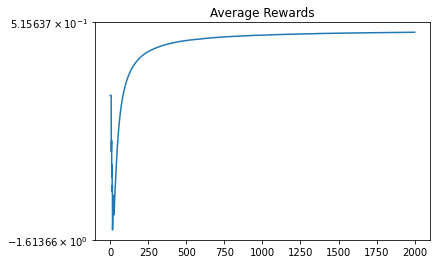

In [37]:
env= GridWorld()
policy = env.getRandomPolicy()
# policy = {(0, 0): 'R', (0, 1): 'R', (0, 2): 'D', (0, 3): 'L', (1, 0): 'U', (1, 1): 'R', (1, 2): 'D', (1, 3): 'D'
#     ,(2, 0): 'D', (2, 1): 'R', (2, 2): 'R', (2, 3): 'D', (3, 0): 'R', (3, 1): 'R', (3, 2): 'R'}
# env.printPolicy(policy)
averageRewards=[]
rewards=[]
alpha=0.1
for i in range(1,2002):
    state = env.reset()
    stepCounts=0
    episodeReward=0
    while (not env.is_terminal(state)) and (stepCounts<20):
        action, nextState, reward = env.move(state, policy,0.01)
        stepCounts += 1
        targetQ=reward
        episodeReward+=reward
        if not env.is_terminal(nextState):
          targetQ=reward+(0.9*env.qTable[nextState][max(env.qTable[nextState], key=env.qTable[nextState].get)])
        env.qTable[state][action]=env.qTable[state][action]+alpha*(targetQ-env.qTable[state][action])
        state = nextState
    rewards.append(episodeReward)
    averageRewards.append(sum(rewards)/i)
    for state in policy:
      policy[state] = max(env.qTable[state], key=env.qTable[state].get)
    if (i-1)%200==0:
        print(f"\n\n\n step:{i-1} - Average reward so far:{sum(rewards)/i}")
        print(f"\n\n\n step:{i-1}")
        env.printPolicy(policy)
        print("\n")
print(f"exploited:{env.exploited}  explored:{env.explored}")

plt.title(f'Total Rewards')
plt.yscale('symlog')
plt.plot(rewards)
plt.savefig("Total Rewards",dpi=200)
plt.clf()
plt.title(f'Average Rewards')
plt.yscale('symlog')
plt.plot(averageRewards)
plt.savefig("Average Rewards",dpi=200)